In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor



In [2]:
df = pd.read_csv(r"C:\Users\T.B\Downloads\BostonHousing.csv")

In [3]:
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [4]:
print("\nShape of the dataset:", df.shape)


Shape of the dataset: (506, 14)


In [5]:
print("\nSummary statistics of the dataset:")
print(df.describe())


Summary statistics of the dataset:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284341   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.705587   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.884000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.6

In [6]:
print("\nInfo about the dataset:")
print(df.info())


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [7]:
print("/n missing values in the dataset:" , df.isnull().sum())

/n missing values in the dataset: crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [8]:
print("/n fix missing values in the dataset:" , df.fillna(df.mean(), inplace=True))

/n fix missing values in the dataset: None


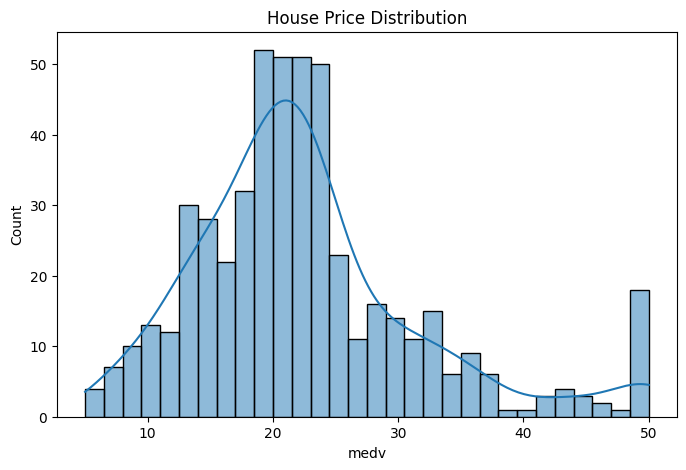

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["medv"], bins=30, kde=True)
plt.title("House Price Distribution")
plt.show()


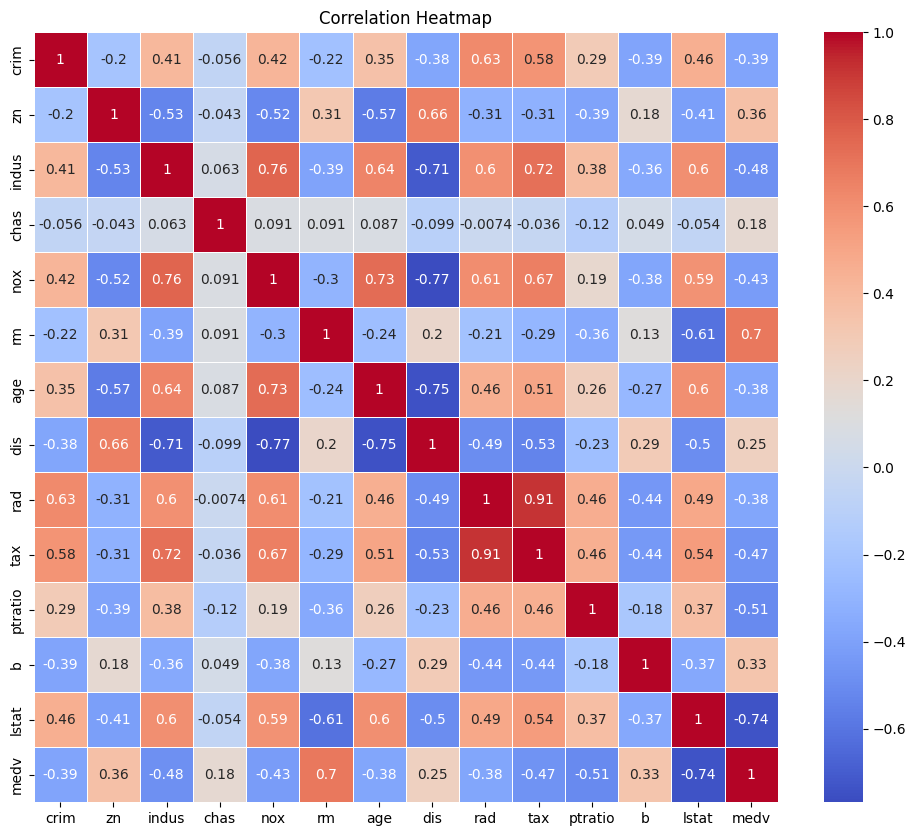

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
X = df.drop("medv", axis=1)
y = df["medv"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print("\nTuning models:")
models_grid = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Ridge Regression": {
        "model": Ridge(),
        "params": {"alpha": [0.1, 1.0, 10.0]}
    },
    "Lasso Regression": {
        "model": Lasso(),
        "params": {"alpha": [0.1, 1.0, 10.0]}
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(),
        "params": {"max_depth": [3, 5, 7, None]}
    },
    "Random Forest": {
        "model": RandomForestRegressor(),
        "params": {"n_estimators": [100, 200], "max_depth": [3, 5, None]}
    },
    "Support Vector Regressor": {
        "model": SVR(),
        "params": {"kernel": ["linear", "rbf"], "C": [0.1, 1.0, 10.0]}
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsRegressor(),
        "params": {"n_neighbors": [3, 5, 7]}
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(),
        "params": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]}
    },
    "XGBoost": {
        "model": XGBRegressor(),
        "params": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]}
    }
}



Tuning models:


In [14]:
best_models = {}
results = {}
for name, model_info in models_grid.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=5, scoring="neg_mean_squared_error")
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    y_pred = best_models[name].predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - Best Params: {grid_search.best_params_}, MSE: {mse:.4f}, R2: {r2:.4f}\n")

Tuning Linear Regression...
Linear Regression - Best Params: {}, MSE: 24.4048, R2: 0.6672

Tuning Ridge Regression...
Ridge Regression - Best Params: {'alpha': 0.1}, MSE: 24.4129, R2: 0.6671

Tuning Lasso Regression...
Lasso Regression - Best Params: {'alpha': 0.1}, MSE: 25.2312, R2: 0.6559

Tuning Decision Tree...
Decision Tree - Best Params: {'max_depth': 7}, MSE: 9.2323, R2: 0.8741

Tuning Random Forest...
Random Forest - Best Params: {'max_depth': None, 'n_estimators': 100}, MSE: 7.9548, R2: 0.8915

Tuning Support Vector Regressor...
Support Vector Regressor - Best Params: {'C': 10.0, 'kernel': 'linear'}, MSE: 33.2991, R2: 0.5459

Tuning K-Nearest Neighbors...
K-Nearest Neighbors - Best Params: {'n_neighbors': 3}, MSE: 21.6596, R2: 0.7046

Tuning Gradient Boosting...
Gradient Boosting - Best Params: {'learning_rate': 0.1, 'n_estimators': 200}, MSE: 6.0912, R2: 0.9169

Tuning XGBoost...
XGBoost - Best Params: {'learning_rate': 0.1, 'n_estimators': 200}, MSE: 6.8150, R2: 0.9071



In [15]:
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.sort_values("R2", ascending=False)

print("\nModel Comparison:")
print(results_df)

best_model_name = results_df.index[0]
final_model = best_models[best_model_name]

print("\nBest Model Selected:", best_model_name)


Model Comparison:
                                MSE        R2
Gradient Boosting          6.091241  0.916938
XGBoost                    6.815001  0.907069
Random Forest              7.954803  0.891526
Decision Tree              9.232301  0.874106
K-Nearest Neighbors       21.659553  0.704644
Linear Regression         24.404825  0.667209
Ridge Regression          24.412888  0.667099
Lasso Regression          25.231228  0.655940
Support Vector Regressor  33.299150  0.545923

Best Model Selected: Gradient Boosting


In [16]:
preds = final_model.predict(X_test)

print("\nFinal Results")
print("MSE:", mean_squared_error(y_test, preds))
print("R2:", r2_score(y_test, preds))



Final Results
MSE: 6.0912409533968725
R2: 0.9169381328646288


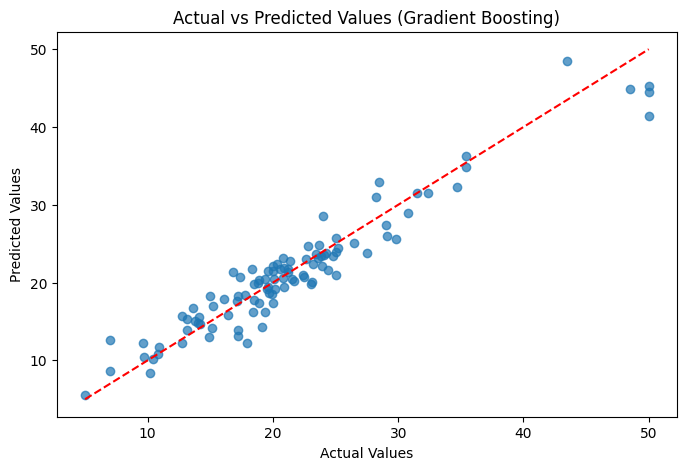

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, preds, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted Values ({best_model_name})")
plt.show()


In [ ]:
new_data = np.array([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98]])
new_pred = final_model.predict(new_data)
print("\nPredicted House Price for New Data:", new_pred[0])



Predicted House Price for New Data: 28.577469213887216
